<a href="https://colab.research.google.com/github/AnikaZN/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Anika_Nacey_DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
import numpy as np

credit = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data')
credit.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']

credit.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [0]:
credit.shape

(689, 16)

In [0]:
credit['A1'].value_counts()

b    467
a    210
?     12
Name: A1, dtype: int64

In [0]:
credit.replace('?', np.NaN, inplace=True)

credit['A1'].value_counts()

b    467
a    210
Name: A1, dtype: int64

In [0]:
credit.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [0]:
clean_credit = credit.fillna(method='bfill')

clean_credit.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [0]:
clean_credit.describe()

,A3,A8,A11,A15
count,689.000000,689.000000,689.000000,689.000000
mean,4.765631,2.224819,2.402032,1018.862119
std,4.978470,3.348739,4.866180,5213.743149
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.165000,0.000000,0.000000
50%,2.750000,1.000000,0.000000,5.000000
75%,7.250000,2.625000,3.000000,396.000000
max,28.000000,28.500000,67.000000,100000.000000


In [0]:
clean_credit.dtypes

#should be 2, 3, 8, 11, 14, 15 as float/int
#what's up with 2 and 14?

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [0]:
#fixed it

clean_credit['A2'] = pd.to_numeric(clean_credit['A2'], errors='coerce')
clean_credit['A14'] = pd.to_numeric(clean_credit['A14'], errors='coerce')

clean_credit.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14      int64
A15      int64
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

# **Exploration/Visualization**

In [0]:
import seaborn as sns

In [0]:
positive = clean_credit[clean_credit['A16'] == '+']
negative = clean_credit[clean_credit['A16'] == '-']

In [0]:
print(positive.shape, negative.shape)

(306, 16) (383, 16)


In [0]:
positive.describe()

#notice: all means are higher except A14
#actually, all values (excluding count, min, max) increase slightly except in A14 column

,A2,A3,A8,A11,A14,A15
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,33.836078,5.924248,3.435016,4.617647,165.258170,2045.522876
std,12.885073,5.469973,4.125652,6.327215,161.353381,7671.419484
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.190000,1.500000,0.750000,0.000000,0.000000,0.000000
50%,30.585000,4.460000,2.000000,3.000000,120.000000,227.500000
75%,41.397500,9.530000,5.000000,7.000000,280.000000,1209.500000
max,76.750000,28.000000,28.500000,67.000000,840.000000,100000.000000


In [0]:
clean_credit.describe()

,A2,A3,A8,A11,A14,A15
count,689.00000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,31.59939,4.765631,2.224819,2.402032,187.529753,1018.862119
std,12.00468,4.978470,3.348739,4.866180,188.706096,5213.743149
min,13.75000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.58000,1.000000,0.165000,0.000000,75.000000,0.000000
50%,28.42000,2.750000,1.000000,0.000000,160.000000,5.000000
75%,38.33000,7.250000,2.625000,3.000000,280.000000,396.000000
max,80.25000,28.000000,28.500000,67.000000,2000.000000,100000.000000


In [0]:
negative.describe()

#all values which increase in 'positive' decrease here
#A14 is, again, the only column which behaves differently

,A2,A3,A8,A11,A14,A15
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,29.812376,3.839948,1.257924,0.631854,205.323760,198.605744
std,10.944614,4.337662,2.120481,1.900049,206.478666,671.608839
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.835000,0.125000,0.000000,100.000000,0.000000
50%,27.250000,2.210000,0.415000,0.000000,168.000000,1.000000
75%,34.915000,5.000000,1.500000,0.000000,272.000000,67.000000
max,80.250000,26.335000,13.875000,20.000000,2000.000000,5552.000000


In [0]:
sns.pairplot(clean_credit)

In [0]:
sns.pairplot(positive)

#there doesn't seem to be a significant difference in the shape of the data when
#it's divided like this

# **Continuous Variables**

T-tests

'A11' and 'A14' were found to have the most and least extreme variability, respectively.

In [0]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
import matplotlib.pyplot as plt
from matplotlib import style

In [0]:
#pretty different

pos1 = positive['A11']
neg1 = negative['A11']

In [0]:
statistic, pvalue = ttest_ind(pos1, neg1)
print(statistic, pvalue)

11.688107254939139 6.519842491876911e-29


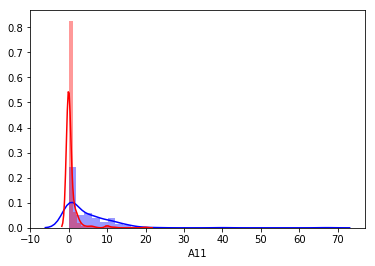

In [0]:
sns.distplot(pos1, color='b')
sns.distplot(neg1, color='r');

In [0]:
#not that different

pos2 = positive['A14']
neg2 = negative['A14']

In [0]:
statistic, pvalue = ttest_ind(pos2, neg2)
print(statistic, pvalue)

#note that with this pvalue we would still reject the null

-2.7826203891115355 0.005540253842441208


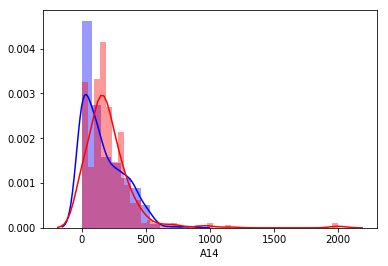

In [0]:
sns.distplot(pos2, color='b')
sns.distplot(neg2, color='r');

In [0]:
#showing my math/documentation for all variables

#2 pvalue 1.0951732421111643e-05
#3 pvalue 3.490724496507552e-08
#8 pvalue 3.188202861884123e-18
#11 pvalue 6.519842491876911e-29 - pretty low, good contender
#14 pvalue 0.005540253842441208 - pretty high
#15 pvalue 3.296216085672561e-06

#select one feature that is extremely different between the classes
#A11 pvalue 6.519842491876911e-29

#another feature that is notably less different
#A14 pvalue 0.005540253842441208

# **Categorical Variables**

Chi-squared tests

'A9' and 'A1' were found to have the most and least extreme variability, respectively.

In [0]:
#pretty different

a9 = pd.crosstab(clean_credit['A9'], clean_credit['A16'], margins = True)
a9

A16,+,-,All
A9,,,
f,23,306,329
t,283,77,360
All,306,383,689


In [0]:
from scipy.stats import chi2_contingency

chi2, p, df, expect = chi2_contingency(a9)
print(f'chi2 stat: {chi2}')
print(f'p-value: {p}')
print(f'df: {df}')
print(f'expected freq: {expect}')

chi2 stat: 357.1649544415432
p-value: 4.975990430471328e-76
df: 4
expected freq: [[146.1161103 182.8838897 329.       ]
 [159.8838897 200.1161103 360.       ]
 [306.        383.        689.       ]]


In [0]:
#not that different

a1 = pd.crosstab(clean_credit['A1'], clean_credit['A16'], margins = True)
a1

A16,+,-,All
A1,,,
a,99,116,215
b,207,267,474
All,306,383,689


In [0]:
from scipy.stats import chi2_contingency

chi2, p, df, expect = chi2_contingency(a1)
print(f'chi2 stat: {chi2}')
print(f'p-value: {p}')
print(f'df: {df}')
print(f'expected freq: {expect}')

#note that with this pvalue we would definitely not reject the null

chi2 stat: 0.3381207306292244
p-value: 0.9872222913209711
df: 4
expected freq: [[ 95.4862119 119.5137881 215.       ]
 [210.5137881 263.4862119 474.       ]
 [306.        383.        689.       ]]


In [0]:
#showing my math/documentation for all variables

#1 p-value: 0.9872222913209711 - this might be the highest p-value I've ever seen
#4 p-value: 9.965375635414722e-05 - weird that this is identical to 5?
#5 p-value: 9.965375635414722e-05
#6 p-value: 5.467419618036717e-10
#7 p-value: 0.00030302914591835153
#9 p-value: 4.975990430471328e-76 - WOW
#10 p-value: 3.78352963294971e-30 - lol only the thirtieth power you're not impressive
#12 p-value: 0.944007059793183
#13 p-value: 0.16630944958702243

#select one feature that is extremely different between the classes
#A9 p-value: 4.975990430471328e-76

#another feature that is notably less different
#A1 p-value: 0.9872222913209711

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

**T-tests**

The t-tests were interesting, because the highest pvalue the data produced was less than 0.05, meaning we would reject the null hypothesis for any of the continuous variables. Hence, it wouldn't be unreasonable to assume that the 'A16' column does have a statistically significant relationship with all of the 6 variables represented here.


**Chi-squared tests**

The chi-squared test looked at all 9 categorical variables, and found that 3 of them had fairly high p-values, meaning we would not reject the null hypothesis for all 3 of these (33% of the variables represented in this category!). However, for the remaining 6 variables where we reject the null hypothesis, two of those variables (A9 and A10) had tiny p-values, with a power of e-76 and e-30, respectively. This indicates some pretty huge relationships between these variables and the 'A16' column, and these are definitely factors I would want to explore further and possibly use as predictive variables.


**Challenge**

I have a hard time knowing what to visualize to explore the data that way before I start running tests. It helps that the statistical testing actually makes more sense to me and I feel like I learn the most from it., but I still think that learning to visualize a more basic understanding of the way the data acts wouldn't be a bad thing at all, and it is a skill I need to work on.